<a href="https://colab.research.google.com/github/Ninthpool/Covid19-Analysis/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: The code below mount your google drive to Colab directory `content/gdive`.Simply upload the folder `covid19` or `covid-19_new` to your google drive first. So that all the code below can run smoothly. 

In [ ]:
#Import google drive so that we can use the dataset. Maybe you need to upload the four csv files to your google drive first.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **An analysis of the spread of COVID-19 within the U.S. with a focus on confirmed cases and mortality rate using data science techniques**

**Author** Heming Wu

##**Introduction:** 
Since the outbreak in Wuhan, China in January 2020, COVID-19 had devastated the world in an unpredented and catastrophic way. As of May 10th, there have been beyond 1.3 million coronavirus confirmed cases in the U.S. and more than eighty thousand lives were taken. With grief and curiosity, in this project, we would utlize various data science techniques (namely visualization, inference and predictions) to study the spread of COVID-19 within the U.S. in state and county level, with a focus on the growth of confirmed cases and the contributing featrues to a high mortality rate.

##**Objective and question to address:**
The focus of this project is to answer how the the COVID-19 spread within the U.S. by measuring count of confirmed cases and its growth with the help of basic visualization and descriptive statistics. As we reside in California, we'll also take emphasis in California and Alameda county and take a look at the situation there. The second question we want to address is what factors affect a U.S. county's COVID-19 mortality rate and if we can build a reasonably accurate model to predict a county's mortality rate based on these factors.  

--------

So let's get started by importing useful python packages and libraries:

In [ ]:
import pandas as pd
import numpy as np
#For plotting:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Load table into the notebook:  
`states` contains the general COVID-19 related statistics of each state in the world.  
`counties` contains non-COVID-19-related statistics of each county in the U.S.    
`time_confirmed_US`is a time series of the number of confirmed cases in U.S. counties starting from 1/22/20  
`time_death_US` is a time series of the number of death cases in U.S. counties starting from 1/22/29.

In [ ]:
states = pd.read_csv("/content/gdrive/My Drive/covid-19_new/5.10states.csv")
counties = pd.read_csv("/content/gdrive/My Drive/covid-19_new/abridged_couties.csv")
time_confirmed_US = pd.read_csv("/content/gdrive/My Drive/covid-19_new/time_series_covid19_confirmed_US.csv")
time_death_US = pd.read_csv("/content/gdrive/My Drive/covid-19_new/time_series_covid19_deaths_US.csv")

In [ ]:
#Change column name 'Long_' to 'Long'
time_confirmed_US.rename(columns={'Long_': 'Long'}, inplace=True)
time_death_US.rename(columns={'Long_': 'Long'}, inplace=True)
states.rename(columns={'Long_': 'Long'}, inplace=True)
counties.rename(columns={'lat' : 'Lat', 'lon' : 'Long'}, inplace=True)

In [ ]:
counties.head(4)

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,Lat,Long,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0


## The heatmap and the circle marker graph below shows the general distribution of number of confirmed cases in different regions within the U.S. As we can see, nearly every state in the U.S. suffers from COVID-19, and the East coast generally have more confirmed cases then other areas. The state of Utah, Arizona and Nevada have less confirmed cases than others.

> Indented block



In [ ]:
import folium as fl
from folium import plugins

#Set figure size of the map
f = fl.Figure(width=500, height=500)

#Make an empty map centered at US. //Turns out (39N, 98W), a city called Lebanon in Kansas, is the geographic center of the U.S. lol
map = fl.Map(location=[39.5, -98.35], 
       zoom_start=4).add_to(f)

#Extract coordinates as a matrix
matrix = time_confirmed_US[['Lat', 'Long']].values.tolist()



# plot the heatmap, adjust radius to maniputlate intensity, adjusst blur to manipulate opacity
plugins.HeatMap(matrix, radius=17, blur=15).add_to(map)

display(map);

In [ ]:
#Set figure size of the map
f = fl.Figure(width=500, height=500)

#Make an empty map centered at US. //Turns out (39N, 98W), a city called Lebanon in Kansas, is the geographic center of the U.S. lol
map1 = fl.Map(location=[39.5, -98.35], 
       zoom_start=4).add_to(f)

#Drop NaN data
states = states.dropna(subset=['Lat', 'Long'])

#Mark each point; Popup need to be string type
states.apply(lambda row:fl.CircleMarker(location=[row["Lat"], row["Long"]], 
                                              radius=row['Confirmed'] / 4000,
                                              popup = row[0],
                                              fill_color="#3db7e4"
                                              )
                                             .add_to(map1), axis=1)


display(map1);

Now let's filter the `states` table and focus on COVID-19 related statistics within the U.S. in state level.

In [ ]:
#Genreal statistics for states within the U.S.
US_general = states[states.Country_Region == 'US']
US_general.head(4)

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-11 02:32:34,32.3182,-86.9023,9889,393,NaN,9496.0,1,210.902479,127421.0,1240.0,3.974113,84000001,USA,2717.504778,12.539185
1,Alaska,US,2020-05-11 02:32:34,61.3707,-152.4044,379,10,324.0,45.0,2,63.404539,27364.0,NaN,2.638522,84000002,USA,4577.841201,NaN
2,American Samoa,US,2020-05-11 02:32:34,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-11 02:32:34,33.7298,-111.4312,11119,536,2775.0,7808.0,4,152.760438,137739.0,1528.0,4.820577,84000004,USA,1892.352732,13.742243


## Graph below plots the Mortality rate in the U.S. in descending order. As we can see, Michigan, Connecticut, and Northen Mariana Islands bear the highest mortality rate of Covind-19 within the U.S, and the state of South Dakota bear the lowest.

In [ ]:
import altair as alt

# Drop NaN in Mortality_Rate for plotting purpose. Change 'Motality_Rate' for something else you want to plot.
US_mortality_rate = US_general[['Province_State', 'Mortality_Rate']].dropna()

# Rename columns for readibility
US_mortality_rate.rename(columns={'Mortality_Rate': 'Mortality Rate %', 'Province_State' : 'States'}, inplace=True)

#plot
alt.Chart(US_mortality_rate).mark_bar().encode(
  x='Mortality Rate %',
  y=alt.Y('States', sort='-x'), #sort by descending order
  color='States'
)

alt.Chart(...)

After having an overlook of the situation among the U.S. Let's take a look at the count of confirmed cases in the state of California and its growth. First we write a function for plotting purpose.

In [ ]:
def plot_county_confirmed(county):
  """
  Return a plot figure of the changes of the number of confirmed case of the counties/States from 1/24 to 5/10
  If want to plot multiple counties/States, separate each entry with `|` 
  """

  ## Get time sereis of the confirmed case count of given counties
  time_series = time_confirmed_US[time_confirmed_US.Combined_Key.str.contains(county)].loc[:, 'Combined_Key':]
  
  ## Manipulate the dataframe,turn the date columns to rows. A step to prepare for plotting
  time_series = pd.DataFrame(time_series.set_index('Combined_Key').stack()).reset_index() \
                                                          .rename(columns={0: 'Confirmed Case Count', 'level_1': 'Date', 'Combined_Key':'County'})
  ## Plot the line
  fig = px.line(time_series, x='Date', y='Confirmed Case Count', color = 'County')
  return fig

## Overview of the state of Cailfornia

In [ ]:
plot_county_confirmed('California').update_layout(title = "Growth of Count of Confirmed Cases")

As shown in the graph above, the Los Angeles county has the most rapidly growth of confirmed cases count within California and was having the most confirmed cases. We could also see in this graph that the coronavirus breakout in California generally started on around 3/28.

## Let's take a look at Sacramento County and Alameda County

In [ ]:
plot_county_confirmed('Sacramento|Alameda').update_layout(title = "Growth of Count of Confirmed Cases in Alameda county and Sacramento county")

From the graph we can clearly see that the growth of confirmed cases count exploded on around 3/16. UC Berkeley cancelled all in-person classes on 3/13, which was just right before the outbreak and was pretty in time.

## Now we will start building the model to predict the mortality rate of a U.S. county

## Prepare tables:

Firstly we need a table containing the name of each county, it's unique FIPS code, and the mortality rate of that county. Unfortunately we don't have the last data we want in the table given. But we can get it by summing up the data in `time_confirmed_US` and `time_death_US`. 


Get confirmed count

In [ ]:
# The total count of confirmed case is at column "5/10", which is the last column.
total = time_confirmed_US.iloc[:, time_confirmed_US.shape[1] - 1]

## Ensure there's no NaN data
print("Number of confirmed cases in each day doesn't contain NaN data?", total.isnull().values.sum() == 0)

# Get total confirmed case by county, which is the last available data
US_confirmed = pd.DataFrame(total.values, columns={"Confirmed"})

# Include FIPS and County Name
US_confirmed["State"] = time_confirmed_US["Province_State"]
US_confirmed["FIPS"] = time_confirmed_US["FIPS"]

# Adjust Order
US_confirmed = US_confirmed[["FIPS", "State", "Confirmed"]]

# Check how many NaN data are there
print("Number of row that contains NaN data:", US_confirmed.isnull().any(axis = 1).sum())

# Not that many and they are in the FIPS column, so we decide to drop all the NaN data.
US_confirmed.dropna(inplace=True)
US_confirmed

Number of confirmed cases in each day doesn't contain NaN data? True
Number of row that contains NaN data: 10


,FIPS,State,Confirmed
0,60.0,American Samoa,0
1,66.0,Guam,151
2,69.0,Northern Mariana Islands,16
3,72.0,Puerto Rico,2198
4,78.0,Virgin Islands,69
...,...,...,...
3248,90053.0,Washington,40
3249,90054.0,West Virginia,0
3250,90055.0,Wisconsin,0
3251,90056.0,Wyoming,0


Get death count

In [ ]:
# The total count of death case is on "5/10", which is the last column.
total = time_death_US.iloc[:, time_death_US.shape[1] - 1]

## Ensure there's no NaN data
print("Count of Death cases in each day doesn't contain NaN data?", total.isnull().values.sum() == 0)

# Sum columns to get total Death case by county.
US_death = pd.DataFrame(total.values, columns={"Death"})

# Include FIPS and County Name
US_death["State"] = time_death_US["Province_State"]
US_death["FIPS"] = time_death_US["FIPS"]

# Adjust Order
US_death = US_death[["FIPS", "State", "Death"]]

# Check how many NaN data are there
print("Number of row that contains NaN data:", US_death.isnull().any(axis = 1).sum())

# Not that many and they are in the FIPS column, so we decide to drop all the NaN data.
US_death.dropna(inplace=True)
US_death

Count of Death cases in each day doesn't contain NaN data? True
Number of row that contains NaN data: 10


,FIPS,State,Death
0,60.0,American Samoa,0
1,66.0,Guam,5
2,69.0,Northern Mariana Islands,2
3,72.0,Puerto Rico,111
4,78.0,Virgin Islands,4
...,...,...,...
3248,90053.0,Washington,0
3249,90054.0,West Virginia,0
3250,90055.0,Wisconsin,0
3251,90056.0,Wyoming,6


Combined two table and filter out the county that has 0 confirmed case, because that will result in an unuseful mortality rate.

In [ ]:
# Temp table contain all data in US_confirmed, plus the Death count, so that we can calculate mortality rate.
temp = US_confirmed
temp['Death'] = US_death['Death']

# Calculate mortality rate. 
temp["Mortality Rate (%)"] = (temp['Death'] / temp['Confirmed']) * 100

# Filter out unuseful data.
US_mortality = temp[temp.Confirmed != 0]
US_mortality

,FIPS,State,Confirmed,Death,Mortality Rate (%)
1,66.0,Guam,151,5,3.311258
2,69.0,Northern Mariana Islands,16,2,12.500000
3,72.0,Puerto Rico,2198,111,5.050045
4,78.0,Virgin Islands,69,4,5.797101
5,1001.0,Alabama,74,4,5.405405
...,...,...,...,...,...
3240,90044.0,Rhode Island,2755,422,15.317604
3243,90047.0,Tennessee,34,0,0.000000
3246,90050.0,Vermont,4,0,0.000000
3248,90053.0,Washington,40,0,0.000000


Next we want to add the county names: First we get County Name and it's FIPS from `counties` table. We found that there's invalid input in "countyFIPS" for New York City and Kansas City, so we explore the dataset a bit and found that these two entries contains a lot of NaN data in `counties` table. Then we decided to drop these two entries. We also change the data type for `FIPS` column, so that it'll prepare for later manipulation.

In [ ]:
county_name = counties[["countyFIPS", "CountyName"]].copy()
county_name

,countyFIPS,CountyName
0,01001,Autauga
1,01003,Baldwin
2,01005,Barbour
3,01007,Bibb
4,01009,Blount
...,...,...
3239,15005,Kalawao
3240,72039,Ciales Municipio
3241,72069,Humacao Municipio
3242,City1,New York City


In [ ]:
# Drop the two entries.
county_name.drop(labels = [3242, 3243], inplace=True)

In [ ]:
# Change data type of FIPS to int for both table.
county_name = county_name.astype({'countyFIPS':int})
US_mortality = US_mortality.astype({'FIPS':int} );

Inner join `US_mortality` and `county_name`, use FIPS as index. Now we can use this table to select metrics in `counties` table for prediction.  
**Notice that we have lost some data, such as the "Grand Princess" with FIPS 9999, an other 'not county' region with a FIPS code greater than 78030 (the largest FIPS code for a county)**

In [ ]:
US_mortality_full = US_mortality.set_index('FIPS').join(county_name.set_index('countyFIPS'), how = 'inner')
# Arange column position
US_mortality_full = US_mortality_full[['CountyName', 'State', 'Confirmed', 'Death', 'Mortality Rate (%)']]
US_mortality_full

,CountyName,State,Confirmed,Death,Mortality Rate (%)
1001,Autauga,Alabama,74,4,5.405405
1003,Baldwin,Alabama,222,5,2.252252
1005,Barbour,Alabama,59,1,1.694915
1007,Bibb,Alabama,46,1,2.173913
1009,Blount,Alabama,44,0,0.000000
...,...,...,...,...,...
56035,Sublette,Wyoming,3,0,0.000000
56037,Sweetwater,Wyoming,19,0,0.000000
56039,Teton,Wyoming,98,0,0.000000
56041,Uinta,Wyoming,9,0,0.000000


Plot the distribution of mortality rate by county and get some general statistics. (EDA)
---



In [ ]:
def mortality_county(df):
    """
    A function that generates a scatter plot of Mortality Rate of each county in the U.S. 
    df must have column "Mortality Rate (%)", "countyName", "Confirmed" and "Death"
    """

    fig = px.scatter(df, x = 'CountyName', y = 'Mortality Rate (%)')
    fig.update_layout(
        title = "Scatter of Mortality Rate by Counties",
        yaxis_title="Mortality Rate (%)"
    )
    fig.show()
    print('Averaged Number of Confirmed Cases:', df.Confirmed.mean(), "    Mean Number of Confirmed Cases:", df.Confirmed.median());
    print('Averaged Number of Death Cases:', df.Death.mean(), "    Mean Number of Death Cases:", df.Death.median())
    print('Averaged Mortality Rate:', df['Mortality Rate (%)'].mean(), "    Mean Number of Mortality:", df['Mortality Rate (%)'].median())

mortality_county(US_mortality_full)

Averaged Number of Confirmed Cases: 459.5618016759777     Mean Number of Confirmed Cases: 30.0
Averaged Number of Death Cases: 27.400488826815643     Mean Number of Death Cases: 1.0
Averaged Mortality Rate: 3.623292315235922     Mean Number of Mortality: 1.3357496072000528


In [ ]:
## Number of counties that have 0 mortality rate.
US_mortality_full[US_mortality_full['Mortality Rate (%)'] == 0].shape[0] / US_mortality_full.shape[0]

0.4584497206703911

There are some counties have a mortality rate of more than 50%, which seems abnormally high. Let's dig deeper into them. 

In [ ]:
US_mortality_full[US_mortality_full['Mortality Rate (%)'] >= 50]

,CountyName,State,Confirmed,Death,Mortality Rate (%)
6103,Tehama,California,1,1,100.0
13125,Glascock,Georgia,1,1,100.0
19007,Appanoose,Iowa,6,3,50.0
35003,Catron,New Mexico,2,1,50.0
38029,Emmons,North Dakota,1,1,100.0
38049,McHenry,North Dakota,2,1,50.0
48107,Crosby,Texas,2,1,50.0
54059,Mingo,West Virginia,2,1,50.0
55051,Iron,Wisconsin,2,1,50.0


Turns out that a lot of the abnormally high mortality rate is the result of less number of confirmed cases. So let's only focus on counties that have more than 10 confirmed cases an update the `US_mortality_full` table. 

In [ ]:
US_mortality_full = US_mortality_full[US_mortality_full.Confirmed >= 10] 
US_mortality_full

,CountyName,State,Confirmed,Death,Mortality Rate (%)
1001,Autauga,Alabama,74,4,5.405405
1003,Baldwin,Alabama,222,5,2.252252
1005,Barbour,Alabama,59,1,1.694915
1007,Bibb,Alabama,46,1,2.173913
1009,Blount,Alabama,44,0,0.000000
...,...,...,...,...,...
56023,Lincoln,Wyoming,11,0,0.000000
56025,Natrona,Wyoming,48,0,0.000000
56033,Sheridan,Wyoming,16,0,0.000000
56037,Sweetwater,Wyoming,19,0,0.000000


Now the scatter plot looks more normal:

In [ ]:
mortality_county(US_mortality_full)

Averaged Number of Confirmed Cases: 644.1545632973504     Mean Number of Confirmed Cases: 66.0
Averaged Number of Death Cases: 38.45731108930324     Mean Number of Death Cases: 2.0
Averaged Mortality Rate: 3.9819647259423854     Mean Number of Mortality: 3.0303030303030303


Mortality rate along is not a thorough description of the COVID-19 condition in a county. Also as we can see from the descriptive statistics above, the average and the mean varies a lot, indicating that there are a ton of of outliers. To address this, we plot a 3d graph of the combination of mortality rate and count of confirmed case and death case. The graph clearly shows that New York is a total outlier in our dataset.    

In [ ]:
px.scatter_3d(US_mortality_full, x='Confirmed', y='Death', z='Mortality Rate (%)', color = 'State')

In [ ]:
px.histogram(US_mortality_full, x = 'Mortality Rate (%)').update_layout(title='Distribution of U.S. County Mortality Rate')

Take a look at the growth of confirmed cases for some of the counties that have highest mortality rate. Namely, Chaffee (23.5%), Waldo (28.6%), Grand Traverse (25%). As we can see, the growth of the confirmed cases among them varies.

In [ ]:
plot_county_confirmed("Chaffee|Waldo|Grand Traverse")

## Now we are ready to select columns in `counties` table and  use those columns to make a table all_counties, which contains mortality rate in each county and all the features we want to use. The table will later be cleaned up and split into training and testing set.

We drop the first 6 columns in `counties` table since they are redundant. Select `POP_LATITUDE` and `POP_LONGTITUDE` instead of `LAT` AND `Long` since the virus spread through human contact. Drop `CensusRegionName` since it's redundant with `CensusDivisionName`. Drop `FracMale2017` since it could be calculated from other columns. Drop `CensusPopulation2010` since we already have `PopulationEstimate2018`. Drop `3-YrDiabetes2015-17` since it's closely related to `DiabetesPercentage`. 

In [ ]:
colUnwanted = ['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 
               'State', 'Lat', 'Long', 'CensusRegionName', 'FracMale2017', 
               'CensusPopulation2010', '3-YrDiabetes2015-17']
colWanted = counties.columns.drop(colUnwanted).tolist()

numerical = ["POP_LATITUDE", "POP_LONGITUDE"] + counties.loc[:, 'PopulationEstimate2018':].columns.tolist()


We first fill the NaN data in `counties` table with the mean value in that column (referring to numerical data).



In [ ]:
temp = counties[numerical].copy()
temp.fillna(temp.mean(), inplace=True);
counties[numerical] = temp
counties

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,Lat,Long,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.000000,27007.000000,28497.000000,0.486578,8392.000000,91.800000,54571.000000,37.000000,11439.000000,8046.00000,16.000000,9.900000,204.500000,56.100000,18.081557,81.790000,324.000000,50.000000,0.00000,1.000000,6.000000,0.326656,1866.000000,1713.000000,2001.000000,1990.000000,2171.000000,...,1594.000000,1736.000000,3978.00000,4265.000000,4040.000000,4165.00000,1524.000000,1559.00000,1279.000000,1498.000000,1821.000000,2192.000000,841.000000,1141.000000,159.000000,392.000000,36.394068,19.723077,21.747368,39.4653,10.000000,20.000000,44.000000,73.000000,112.000000,143.000000,109.000000,595.724338,737519.000000,737504.000000,737497.000000,737500.000000,737503.000000,737512.000000,737500.0,737495.0,0.435400,4.180543,10663.317641,12744.207323
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.000000,103225.000000,109403.000000,0.485472,42413.000000,114.700000,182265.000000,41.100000,54145.000000,41590.00000,33.000000,8.500000,183.200000,41.900000,17.489033,54.280000,2101.000000,536.000000,0.00000,3.000000,51.000000,0.253255,5614.000000,5544.000000,5832.000000,5767.000000,6076.000000,...,5317.000000,5392.000000,11620.00000,11933.000000,13047.000000,13874.00000,5943.000000,6580.00000,5728.000000,6284.000000,8558.000000,9245.000000,4379.000000,5153.000000,1176.000000,2057.000000,13.000000,19.723077,21.747368,23.0000,30.000000,52.000000,125.000000,262.000000,434.000000,546.000000,597.000000,595.724338,737519.000000,737504.000000,737497.000000,737500.000000,737503.000000,737512.000000,737500.0,737495.0,0.216200,4.180543,10663.317641,12744.207323
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.000000,13335.000000,11935.000000,0.527701,4757.000000,31.000000,27457.000000,39.000000,6681.000000,4706.00000,51.180667,15.700000,220.400000,49.000000,21.999985,69.820000,181.000000,12.000000,0.00000,1.000000,5.000000,0.893106,847.000000,855.000000,826.000000,816.000000,820.000000,...,1162.000000,646.000000,2115.00000,1513.000000,2164.000000,1854.00000,910.000000,907.00000,859.000000,940.000000,1067.000000,1171.000000,498.000000,730.000000,129.000000,314.000000,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,21.000000,44.000000,65.000000,72.000000,68.000000,595.724338,737519.000000,

In [ ]:
#Check the operation above, can be deleted.
null_count = counties.isnull().sum().sort_values(ascending=False).reset_index().rename(columns = {'index': 'col_name', 0: 'num_null'})
null_count.head(15)

,col_name,num_null
0,State,169
1,Lat,169
2,Long,169
3,CensusDivisionName,98
4,CensusRegionName,98
5,Rural-UrbanContinuumCode2013,24
6,STATEFP,23
7,COUNTYFP,23
8,dem_to_rep_ratio,0
9,Smokers_Percentage,0


Define a function helps with generating the `all_counties` table, which will later be used to split in `train` and `test`. Pass in a **list** of column names in table `counties` and the function returns a table "identical" to `US_mortality_full` but with all the columns added. The return table has the same number of row as in `US_mortality_full`, but the data is not fully cleaned yet (there are NaN in categorical data).

In [ ]:
def select_from_counties(cols):
    """ 
    Select column `cols` from table `counties`, clean the data,
    and return the table with `cols` added to table `US_mortality_full`.

    The input `cols` is a list. 
    """
    #Clean `counties` table (drop the last two row which has invalid FIPS "City1", "City2")
    #And set FIPS (int type) to be the index
    ind = counties.countyFIPS.iloc[:3224].astype(int)
    new_counties = counties.iloc[:3224, :].set_index(ind)

    #Drop column `CountyName` and `State` from `new_countries`, which are duplicaes. So that it's easier to join with `US_mortality_full.
    new_counties.drop(columns=["CountyName", "State"], inplace=True)

    #Left join `US_mortality_full` and `counties` so that the return table has same number of rows as in `US_mortality_full`
    raw = US_mortality_full.merge(new_counties, how='left', left_index=True, right_index=True)
    
    #Columns that we want to keep
    want = US_mortality_full.columns.to_list() + cols

    #select all rows and columns we want
    result = raw.loc[:, want]
    return result


Generate `all_counties` table with all the columns we want.

In [ ]:
all_counties = select_from_counties(colWanted)
all_counties

,CountyName,State,Confirmed,Death,Mortality Rate (%),POP_LATITUDE,POP_LONGITUDE,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
1001,Autauga,Alabama,74,4,5.405405,32.500389,-86.494165,East South Central,2.0,55601.0,27007.0,28497.0,8392.0,91.8,37.0,11439.0,8046.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,36.394068,19.723077,21.747368,39.4653,10.000000,20.000000,44.000000,73.0,112.0,143.0,109.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,4.180543,10663.317641,12744.207323
1003,Baldwin,Alabama,222,5,2.252252,30.548923,-87.762381,East South Central,3.0,218022.0,103225.0,109403.0,42413.0,114.7,41.1,54145.0,41590.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.000000,19.723077,21.747368,23.0000,30.000000,52.000000,125.000000,262.0,434.0,546.0,597.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,4.180543,10663.317641,12744.207323
1005,Barbour,Alabama,59,1,1.694915,31.844036,-85.310038,East South Central,6.0,24881.0,13335.0,11935.0,4757.0,31.0,39.0,6681.0,4706.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,21.000000,44.0,65.0,72.0,68.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.080000,5400.000000,18241.000000
1007,Bibb,Alabama,46,1,2.173913,33.030921,-87.127659,East South Central,1.0,22400.0,12138.0,10530.0,3632.0,36.8,37.8,5128.0,3389.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,24.000000,37.0,62.0,56.0,45.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.750000,14980.000000,6120.000000
1009,Blount,A

Add mortality rate level

In [ ]:
US_general = US_general[US_general.FIPS <= 56].copy()
temp = US_general.Mortality_Rate
US_general['Mortality Rate Level'] = pd.qcut(temp, 3, labels=['low', 'medium', 'high'])
US_general.head(5)
mortality_level = US_general[['Province_State', 'Mortality Rate Level']].copy()
mortality_level.head(5)

,Province_State,Mortality Rate Level
0,Alabama,medium
1,Alaska,low
3,Arizona,medium
4,Arkansas,low
5,California,medium


update all_counties table by adding `Mortality Rate Level`, which is a label we can utilize for decision tree method of training.

In [ ]:
# Re-define all_counties table so that the cell can be run for multiple times without changing the value.
all_counties = select_from_counties(colWanted)
all_counties_new = all_counties.merge(mortality_level, left_on='State', right_on='Province_State', how='left')
all_counties = all_counties_new.drop('Province_State', axis = 1)
all_counties

,CountyName,State,Confirmed,Death,Mortality Rate (%),POP_LATITUDE,POP_LONGITUDE,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,...,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,Mortality Rate Level
0,Autauga,Alabama,74,4,5.405405,32.500389,-86.494165,East South Central,2.0,55601.0,27007.0,28497.0,8392.0,91.8,37.0,11439.0,8046.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,...,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,36.394068,19.723077,21.747368,39.4653,10.000000,20.000000,44.000000,73.0,112.0,143.0,109.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,4.180543,10663.317641,12744.207323,medium
1,Baldwin,Alabama,222,5,2.252252,30.548923,-87.762381,East South Central,3.0,218022.0,103225.0,109403.0,42413.0,114.7,41.1,54145.0,41590.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,...,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.000000,19.723077,21.747368,23.0000,30.000000,52.000000,125.000000,262.0,434.0,546.0,597.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,4.180543,10663.317641,12744.207323,medium
2,Barbour,Alabama,59,1,1.694915,31.844036,-85.310038,East South Central,6.0,24881.0,13335.0,11935.0,4757.0,31.0,39.0,6681.0,4706.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,...,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,21.000000,44.0,65.0,72.0,68.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.080000,5400.000000,18241.000000,medium
3,Bibb,Alabama,46,1,2.173913,33.030921,-87.127659,East South Central,1.0,22400.0,12138.0,10530.0,3632.0,36.8,37.8,5128.0,3389.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,...,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,24.000000,37.0,62.0,56.0,45.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.750000,14980.000000,6120.000000,medium
4

In [ ]:
row_anynull = all_counties.isnull().any(axis=1).sum()
print(f"There are {row_anynull} rows in all_counties table that has NaN value.")

There are 2 rows in all_counties table that has NaN value.


Further data cleaning: As we can see above, there are only two rows in `all_counties` that contain any NaN data. Therefore we decide to simply drop them.

In [ ]:
all_counties.dropna(inplace=True)
all_counties

,CountyName,State,Confirmed,Death,Mortality Rate (%),POP_LATITUDE,POP_LONGITUDE,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,...,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,Mortality Rate Level
0,Autauga,Alabama,74,4,5.405405,32.500389,-86.494165,East South Central,2.0,55601.0,27007.0,28497.0,8392.0,91.8,37.0,11439.0,8046.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,...,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,36.394068,19.723077,21.747368,39.4653,10.000000,20.000000,44.000000,73.0,112.0,143.0,109.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,4.180543,10663.317641,12744.207323,medium
1,Baldwin,Alabama,222,5,2.252252,30.548923,-87.762381,East South Central,3.0,218022.0,103225.0,109403.0,42413.0,114.7,41.1,54145.0,41590.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,...,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.000000,19.723077,21.747368,23.0000,30.000000,52.000000,125.000000,262.0,434.0,546.0,597.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,4.180543,10663.317641,12744.207323,medium
2,Barbour,Alabama,59,1,1.694915,31.844036,-85.310038,East South Central,6.0,24881.0,13335.0,11935.0,4757.0,31.0,39.0,6681.0,4706.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,...,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,21.000000,44.0,65.0,72.0,68.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.080000,5400.000000,18241.000000,medium
3,Bibb,Alabama,46,1,2.173913,33.030921,-87.127659,East South Central,1.0,22400.0,12138.0,10530.0,3632.0,36.8,37.8,5128.0,3389.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,...,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,36.394068,19.723077,21.747368,39.4653,50.716632,53.012801,24.000000,37.0,62.0,56.0,45.0,595.724338,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.750000,14980.000000,6120.000000,medium
4

##Ready to load model and do predictions!

## Split `train` and `test`

In [ ]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(
    all_counties, train_size=0.85, test_size=0.15, random_state=42)
print('Train:', train.shape, 'Test:', test.shape)

Train: (1730, 81) Test: (306, 81)


Look deeper into the training data and use some visualization to justify selection of features.


** start visualization **


In [ ]:
px.box(train, x = 'CensusDivisionName', y = 'Mortality Rate (%)', points='all') \
            .update_layout(title = 'Distribution of Mortality Rate by Census Division')

The graph above shows that the mortality rate in West South Central division and the East North Central division vary the most. From the graph we generally agree that the Census Division feature does help with our prediction.

In [ ]:
def moreDem(row):
  val = 1 if row['dem_to_rep_ratio'] > 1 else 0
  return val

temp = train.copy()
temp['moreDem'] = temp.apply(moreDem, axis = 1)
px.scatter(temp, x = 'dem_to_rep_ratio', y = 'Mortality Rate (%)',color='moreDem') \
              .update_layout(title='Mortality Rate VS. dem-to-rep Ratio in a County')

From the graph above we draw the conclusion that democratics to republicans ratio in a county has very little to do with a county's mortality rate. 

In [ ]:
px.scatter(train, x='Smokers_Percentage', y='Mortality Rate (%)') \
        .update_layout(title='Smokers Percentage in a County VS Mortality Rate')

As shown above, the smoker percentage in a county has a corelation (but maybe not very strong) with the mortality rate.

In [ ]:
px.box(train, x='Rural-UrbanContinuumCode2013', y='Mortality Rate (%)') \
          .update_layout(title='Mortality Rate and Rural-Urban Continuum')

** end visualization **

Preprocess the data before doing prediction. Standardize all `numerical` features  and convert all `cateogorical` features using one-hot encoding. Defube a function `process_features` which can be use on `train` and `test` data and return a matrix containing all the scaled/converted data we want to use for prediction.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Notice I include `Confirmed` here.
numerical = ["Confirmed", "POP_LATITUDE", "POP_LONGITUDE"] + train.loc[:, 'PopulationEstimate2018':'HPSAUnderservedPop'].columns.tolist()

## Didn't include 'CensusDivisionName', 'State', and county name because there might be names in test set and not in train set, which will lead to error..
categorical = ['Rural-UrbanContinuumCode2013', 'Mortality Rate Level']

scaler = StandardScaler()
scaler.fit(train[numerical])

# encoder = OneHotEncoder()
# encoder.fit(train[categorical])

def process_features(t):
    """ 
    Procee features by standardizing numerical data and one-hot encoding 
    categorical data. Input table should be similar to `all_counties`.    
    """
    scaled = t[numerical].copy()
    scaled.iloc[:,:] = scaler.transform(scaled) # Convert to standard units

    # encoded = t[categorical].copy()
    # encoded.iloc[:,:] = encoded.transform(encoded) # One-hot encoding

    categoricals = [pd.get_dummies(t[s], prefix=s, drop_first=True) for s in categorical]
    return pd.concat([scaled] + categoricals, axis=1)
process_features(train)

,Confirmed,POP_LATITUDE,POP_LONGITUDE,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,...,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,Rural-UrbanContinuumCode2013_2.0,Rural-UrbanContinuumCode2013_3.0,Rural-UrbanContinuumCode2013_4.0,Rural-UrbanContinuumCode2013_5.0,Rural-UrbanContinuumCode2013_6.0,Rural-UrbanContinuumCode2013_7.0,Rural-UrbanContinuumCode2013_8.0,Rural-UrbanContinuumCode2013_9.0,Mortality Rate Level_medium,Mortality Rate Level_high
1065,-0.123737,0.398070,-0.393566,-0.327586,-0.324863,-0.326153,-0.352826,-0.153834,0.414585,-0.376613,-0.362828,0.256717,-0.193301,0.478655,0.281012,2.337446,-0.290055,-0.283719,-0.467370,-0.268296,-0.294992,-0.487344,-0.318522,-0.315408,-0.319518,-0.322315,-0.310135,-0.313291,-0.311577,-0.314958,-0.317600,-0.321661,-0.299611,-0.294164,-0.296532,-0.298052,-0.305072,-0.304395,-0.324433,-0.324599,...,-0.352832,-0.345569,-0.332615,-0.347493,-0.293403,-0.331658,0.009249,0.022475,0.011969,0.007990,0.005349,-0.012140,-0.422058,-0.394990,-0.393767,-0.365244,-0.328433,0.011456,1.755115,-0.102236,0.309704,0.229513,0.458315,3.260196,0.0,0.0,-1.294591,-0.559012,-0.707135,-0.567208,0,0,0,0,0,0,0,0,0,1
1947,-0.122733,1.680699,-2.619482,-0.323358,-0.321325,-0.323186,-0.326761,-0.174058,1.448260,-0.341172,-0.329256,-0.612190,-0.810147,-0.676308,-0.977217,-0.471827,-0.292634,-0.268284,-0.467370,0.060890,-0.344615,-0.071908,-0.325537,-0.324061,-0.327617,-0.329485,-0.316221,-0.319325,-0.323631,-0.319572,-0.325168,-0.325655,-0.301851,-0.304126,-0.302884,-0.299945,-0.307235,-0.311040,-0.330201,-0.329210,...,-0.322060,-0.333435,-0.332615,-0.345665,-0.319212,-0.345969,0.009249,0.022475,0.011969,0.007990,0.005349,-0.012140,-0.422058,-0.386658,-0.389559,-0.393401,-0.383998,0.011456,-1.097026,0.372105,-1.515352,-0.377146,-0.598513,-0.680610,0.0,0.0,0.143241,-0.334026,-0.739377,-0.344948,0,0,0,0,1,0,0,0,0,1
2025,-0.046215,1.108662,0.116547,0.660650,0.655809,0.656800,0.923808,0.191913,0.690232,0.959600,1.010564,-0.802263,-1.336407,-1.253789,-1.619252,-1.224962,0.475627,0.989450,3.207861,0.719262,0.290552,-0.266379,0.496090,0.512380,0.708765,0.701289,0.732882,0.773246,0.639363,0.583307,0.308502,0.310006,0.365766,0.354066,0.431468,0.430518,0.625091,0.652362,0.932949,0.923076,...,0.885518,0.822281,0.966284,0.929342,0.814957,0.911503,-0.926546,0.022475,0.011969,-0.261749,-0.043379,-0.077821,0.305725,0.385491,0.632960,0.916716,1.159614,0.011456,-0.689577,-1.050919,-0.420318,-0.073816,-0.598513,-0.680610,0.0,0.0,-1.805232,-0.026910,-0.158612,-0.027887,0,0,0,0,0,0,0,0,1,0
45,-0.107269,-0.738581,0.146705,-0.303583,-0.301601,-0.301498,-0.304264,-0.158025,0.873996,-0.326054,-0.321075,1.994529,2.409962,1.586477,0.463012,1.505847,-0.274192,-0.285

In [ ]:
process_features(train).isnull().sum()

Confirmed                           0
POP_LATITUDE                        0
POP_LONGITUDE                       0
PopulationEstimate2018              0
PopTotalMale2017                    0
                                   ..
Rural-UrbanContinuumCode2013_7.0    0
Rural-UrbanContinuumCode2013_8.0    0
Rural-UrbanContinuumCode2013_9.0    0
Mortality Rate Level_medium         0
Mortality Rate Level_high           0
Length: 84, dtype: int64

Define loss function for linear model.

In [ ]:
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

Predict mortality rate based on features selected.

> Indented block



In [ ]:
from sklearn.linear_model import LinearRegression

model_direct = LinearRegression(fit_intercept=True)
model_direct.fit(process_features(train), train['Mortality Rate (%)'])

Y_hat_direct = model_direct.predict(process_features(test))

Y = test['Mortality Rate (%)']

linear_rmse = rmse(Y - Y_hat_direct)
linear_rmse


4.390047410907081

In [ ]:
Y_hat_direct[:5]

array([3.43940164, 2.54749835, 3.4076096 , 1.8880259 , 2.73504371])

In [ ]:
model_direct.score(process_features(test), test['Mortality Rate (%)'])

0.05396728072787582

First predict death case then divided by confirmed case (presented in the training set).

In [ ]:
from sklearn.linear_model import LinearRegression

model_from_confirmed = LinearRegression(fit_intercept=True)
model_from_confirmed.fit(process_features(train), train['Confirmed'])

# model_from_confirmed.score(process_features(test), test['Confirmed'])

predicted_confirmed = model_from_confirmed.predict(process_features(test))

Y_hat_from_confirmed = ( test['Death'] / predicted_confirmed) * 100
Y = test['Mortality Rate (%)']

rmse(Y_hat_from_confirmed - Y)

2.147629243446875e-12

Compare predicted value and actual value in the test set:

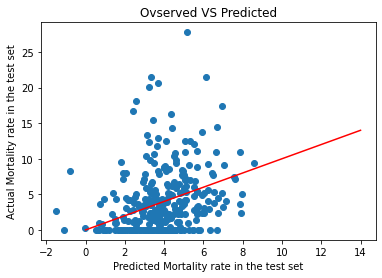

In [ ]:
plt.scatter(x=Y_hat_direct, y = Y)
plt.plot(range(15), range(15), color='red');
plt.xlabel("Predicted Mortality rate in the test set")
plt.ylabel("Actual Mortality rate in the test set");
plt.title("Ovserved VS Predicted");

From the graph above we can see that our model is generally underfitting.

In [ ]:
#Dengcheng add this for getting maybe better and less features
'''
#We combine columns with get 2 new columns for pop less65 and over 65
x = counties.copy()
pop = x.loc[:, 'PopMale<52010' : 'PopFmle>842010']
#we just assume the null are just 0, and we will sum all those columns
pop.fillna(0, inplace = True)
x['pop_less_65'] = pop.loc[:, :'PopFmle60-642010'].sum(axis=1)
x['pop_over_65'] = pop.loc[:, 'PopMale65-742010':].sum(axis=1)

#same concept for mortality
mortality = x.loc[:, '3-YrMortalityAge<1Year2015-17': '3-YrMortalityAge85+Years2015-17']
mortality.fillna(0, inplace = True)
x['mortality_less65'] = mortality.loc[:,:'3-YrMortalityAge55-64Years2015-17'].sum(axis=1)
x['mortality_over65'] = mortality.loc[:,'3-YrMortalityAge65-74Years2015-17':].sum(axis=1)


restriction = x.loc[:, 'stay at home':'foreign travel ban']
#For all those restriction, we just assume if null they are equal to the latest date of that column
restriction.fillna(restriction.max(), inplace=True)
#Then we the max to subtract the value to get the date difference of all rows
restriction = restriction.max() - restriction
#observed that two columns('federal guidelines' and 'foreign travel ban') are all 0s
#that means maybe the whole nation started those 2 restrictions at the same day we can drop them later
restriction.loc[:, (restriction != 0).any(axis=0)]
x.loc[:, 'stay at home':'foreign travel ban'] = restriction
x
'''